# Desafio DWE50 - Yasmim Abrahão Charles Lima

O modo conceitual que foi utilizado no desafio:

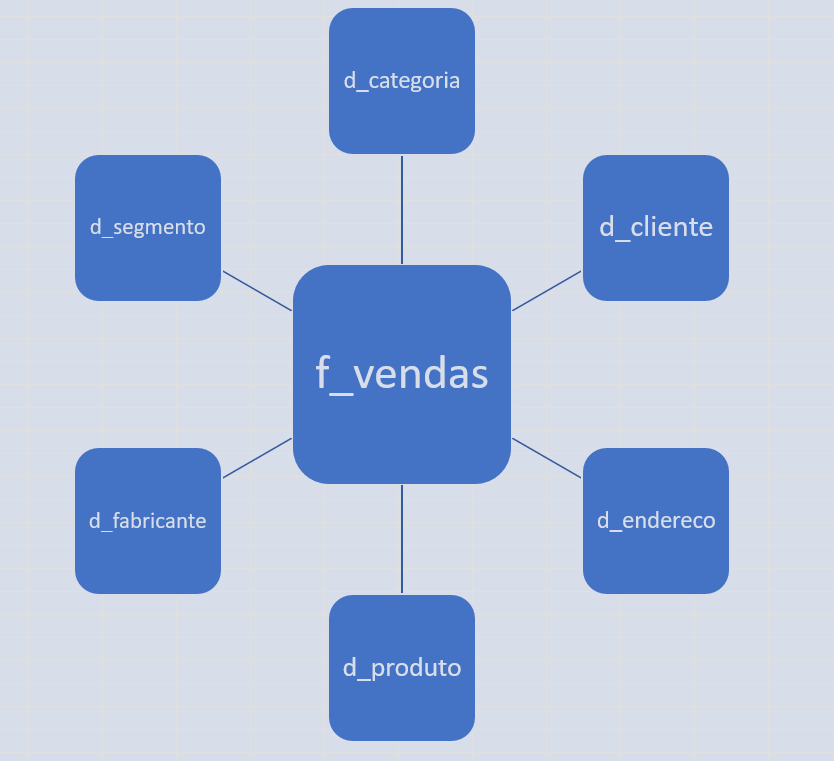

## Parte 1 do desafio

Observação: Como este código foi feito para o desafio DWE, inclui processos de visualização de tabelas, utilizando funções como print(), display(), .head(), etc., para exemplificar o tratamento dos dados. Em um contexto diferente, eu teria removido esses passos para focar exclusivamente no tratamento dos dados. Além disso, foram criadas novas variáveis específicas para cada questão na Parte 2, em vez de reutilizar as já existentes existentes, para deixar as respostas mais claras e intuitivas.


In [1]:
# Instalando as bibliotecas que serão utilizadas no desafio
!pip install pandas
!pip install pyarrow

In [2]:
# Importando as bilbiotecas que serão utilizadas no desafio
import pandas as pd
import os
import glob
import shutil

In [3]:
# Carregando o arquivo da landing zone e dando uma olhada nele, como é um código de desafio deixei o código
df_original = pd.read_csv(r'C:\DWE_LAKEHOUSE\LANDING\Vendas.csv')

df_original.head(2)

,IDProduto,Data,IDCliente,IDCampanha,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,CodigoPostal,EmailNome,Cidade,Estado,Regiao,Distrito,Pais
0,449,2012-07-26 00:00:00.000,247546,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33194,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,District #10,USA
1,449,2013-10-31 00:00:00.000,124593,22,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,33177,"(Elliott.Stuart@xyza.com): Stuart, Elliott","Miami, FL, USA",FL,East,District #10,USA


In [4]:
# Guardando o csv de vendas mas em parquet na camada bronze
if not os.path.exists(r'C:\DWE_LAKEHOUSE\BRONZE'):
        os.mkdir(r'C:\DWE_LAKEHOUSE\BRONZE')
else:
    df_original.to_parquet(r'C:\DWE_LAKEHOUSE\BRONZE\Vendas.parquet', index=False)

### Agora será feito o tratamento para a camada silver dos arquivos, limpando as colunas, retirando as desnecessárias etc

In [5]:
# Eliminando as colunas IDCampanha, distrito e código postal, fazendo primeiramente para deixar o dataset mais leve
df_original.drop(['IDCampanha', 'CodigoPostal', 'Distrito'], axis=1, inplace=True)
df_original.head(1)

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,EmailNome,Cidade,Estado,Regiao,Pais
0,449,2012-07-26 00:00:00.000,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,"(Nerea.Barry@xyza.com): Barry, Nerea","Miami, FL, USA",FL,East,USA


In [6]:
# Tratando os dados relacionados à cidade

# Separando a cidade do restante do campo, considerando a primeira parte antes da primeira vírgula
df_original["Cidade"] = df_original["Cidade"].str.split(pat=',', n=1, expand=True)[0]

df_original.head(1)

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,EmailNome,Cidade,Estado,Regiao,Pais
0,449,2012-07-26 00:00:00.000,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,"(Nerea.Barry@xyza.com): Barry, Nerea",Miami,FL,East,USA


In [7]:
# Separando a coluna 'EmailNome' para extrair email, nome e sobrenome
# Separando o email da coluna 'EmailNome' e removendo parênteses
df_original["Email"] = df_original["EmailNome"].str.split(pat=':', n=1, expand=True)[0].str.replace('(', '').str.replace(')', '').str.lower()

# Separando sobrenome e nome da coluna 'EmailNome' e removendo vírgulas
df_original[["Sobrenome", "Nome"]] = df_original["EmailNome"].str.split(pat=': ', n=1, expand=True)[1].str.split(pat=', ', n=1, expand=True)

df_original.head(1)

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,EmailNome,Cidade,Estado,Regiao,Pais,Email,Sobrenome,Nome
0,449,2012-07-26 00:00:00.000,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,"(Nerea.Barry@xyza.com): Barry, Nerea",Miami,FL,East,USA,nerea.barry@xyza.com,Barry,Nerea


In [8]:
# Eliminando a coluna restante de EmailNome
df_original.drop(['EmailNome'], axis=1, inplace=True)
df_original.head(1)

,IDProduto,Data,IDCliente,Unidades,Produto,Categoria,Segmento,IDFabricante,Fabricante,CustoUnitario,PrecoUnitario,Cidade,Estado,Regiao,Pais,Email,Sobrenome,Nome
0,449,2012-07-26 00:00:00.000,247546,1,Maximus UM-54,Urban,Moderation,7,VanArsdel,74.729917,102.36975,Miami,FL,East,USA,nerea.barry@xyza.com,Barry,Nerea


In [9]:
# Adicionando a coluna de lucro na tabela
df_original["Lucro"] = df_original["PrecoUnitario"] - df_original["CustoUnitario"]

In [10]:
df_original["Lucro"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 675368 entries, 0 to 675367
Series name: Lucro
Non-Null Count   Dtype  
--------------   -----  
675368 non-null  float64
dtypes: float64(1)
memory usage: 5.2 MB


In [11]:
# Convertendo a data para tipo Date e adicionando as colunas de ano, mês e dia
df_original["Data"] = pd.to_datetime(df_original["Data"])
df_original["Ano"] = df_original["Data"].dt.year
df_original["Mes"] = df_original["Data"].dt.month
df_original["Dia"] = df_original["Data"].dt.day

### Inserindo a tabela na camada silver após os tratamentos

In [12]:
if not os.path.exists(r'C:\DWE_LAKEHOUSE\BRONZE'):
    os.mkdir(r'C:\DWE_LAKEHOUSE\BRONZE')
else:
    df_original.to_parquet(r'C:\DWE_LAKEHOUSE\SILVER\tabela_vendas_tratada.parquet', index=False)

### Fazendo as transformações em dimensão e fato, logo as dimensões serão: produto, categoria, segmento, fabricante, endereco, cliente

In [13]:
# Criando a dimensão produto, onde tiramos as duplicadas, adicionamos uma índice, para ser a chave estrangeira, onde foi calculado em cima do tamanho da coluna de produtos
df_original_temp = df_original[["IDProduto", "Produto"]].drop_duplicates(subset=["IDProduto", "Produto"])
df_d_produto = pd.DataFrame({
    "sk_Produto": range(1, len(df_original_temp) + 1),
    "IDProduto": df_original_temp["IDProduto"].tolist(),
    "Produto": df_original_temp["Produto"].tolist()
})
df_d_produto.reset_index(drop=True, inplace=True)
display(df_d_produto) # Estou utilizando o display por conta da melhor formação em relação ao print


,sk_Produto,IDProduto,Produto
0,1,449,Maximus UM-54
1,2,470,Maximus UM-75
2,3,496,Maximus UM-01
3,4,457,Maximus UM-62
4,5,433,Maximus UM-38
...,...,...,...
207,208,398,Maximus UM-03
208,209,405,Maximus UM-10
209,210,406,Maximus UM-11
210,211,402,Maximus UM-07


In [14]:
# O mesmo passo anterior mas para a criação da dimensão categoria
df_original_temp = df_original[["Categoria"]].drop_duplicates(subset="Categoria")
df_d_categoria = pd.DataFrame({
    "sk_Categoria": range(1, len(df_original_temp) + 1),
    "Categoria": df_original_temp["Categoria"].tolist()
})
df_d_categoria.reset_index(drop=True, inplace=True)
display(df_d_categoria)

,sk_Categoria,Categoria
0,1,Urban
1,2,Mix
2,3,Youth
3,4,Rural
4,5,Accessory


In [15]:
# O mesmo passo anterior mas para a criação da dimensão segmento
df_original_temp = df_original[["Segmento"]].drop_duplicates(subset="Segmento")
df_d_segmento = pd.DataFrame({
    "sk_Segmento": range(1, len(df_original_temp) + 1),
    "Segmento": df_original_temp["Segmento"].tolist()
})
df_d_segmento.reset_index(drop=True, inplace=True)
display(df_d_segmento)

,sk_Segmento,Segmento
0,1,Moderation
1,2,Convenience
2,3,Extreme
3,4,Regular
4,5,All Season
5,6,Productivity
6,7,Youth
7,8,Select
8,9,Accessory


In [16]:
# O mesmo passo anterior mas para a criação da dimensão cliente, que possui nome, sobrenome e email juntos
df_original_temp = df_original[["IDCliente", "Nome", "Sobrenome", "Email"]].drop_duplicates(subset=["IDCliente", "Nome", "Sobrenome", "Email"])
df_d_cliente = pd.DataFrame({
    "sk_Cliente": df_original_temp["IDCliente"],
    "Nome": df_original_temp["Nome"].tolist(),
    "Sobrenome": df_original_temp["Sobrenome"].tolist(),
    "Email": df_original_temp["Email"].tolist()
})
df_d_cliente.reset_index(drop=True, inplace=True)
display(df_d_cliente)

,sk_Cliente,Nome,Sobrenome,Email
0,247546,Nerea,Barry,nerea.barry@xyza.com
1,124593,Elliott,Stuart,elliott.stuart@xyza.com
2,163517,Holmes,Swanson,holmes.swanson@xyza.com
3,8875,Nyssa,Solis,nyssa.solis@xyza.com
4,8894,Ivana,Wall,ivana.wall@xyza.com
...,...,...,...,...
282591,274255,Kirestin,Sloan,kirestin.sloan@xyza.com
282592,106491,Bethany,Mcdaniel,bethany.mcdaniel@xyza.com
282593,188636,Venus,Floyd,venus.floyd@xyza.com
282594,203361,Patience,Williams,patience.williams@xyza.com


In [17]:
# O mesmo passo anterior mas para a criação da dimensão fabricante
df_original_temp = df_original[["IDFabricante", "Fabricante"]].drop_duplicates(subset=["IDFabricante", "Fabricante"])
df_d_fabricante = pd.DataFrame({
    "sk_Fabricante": range(1, len(df_original_temp) + 1),
    "IDFabricante": df_original_temp["IDFabricante"].tolist(),
    "Fabricante": df_original_temp["Fabricante"].tolist()
})
df_d_fabricante.reset_index(drop=True, inplace=True)
display(df_d_fabricante)

,sk_Fabricante,IDFabricante,Fabricante
0,1,7,VanArsdel


In [18]:
# O mesmo passo anterior mas para a criação da dimensão endereço
df_original_temp = df_original[["Cidade", "Estado", "Regiao", "Pais"]].drop_duplicates(subset=["Cidade", "Estado", "Regiao", "Pais"])
df_d_endereco = pd.DataFrame({
    "sk_Endereco": range(1, len(df_original_temp) + 1),
    "Cidade": df_original_temp["Cidade"].tolist(),
    "Estado": df_original_temp["Estado"].tolist(),
    "Regiao": df_original_temp["Regiao"].tolist(),
    "Pais": df_original_temp["Pais"].tolist()
})
df_d_endereco.reset_index(drop=True, inplace=True)
display(df_d_endereco)

,sk_Endereco,Cidade,Estado,Regiao,Pais
0,1,Miami,FL,East,USA
1,2,Fort Lauderdale,FL,East,USA
2,3,Port Saint Lucie,FL,East,USA
3,4,Fort Myers,FL,East,USA
4,5,Tampa,FL,East,USA
...,...,...,...,...,...
22359,22360,Gunlock,KY,East,USA
22360,22361,Blackwater,VA,East,USA
22361,22362,Clairfield,TN,East,USA
22362,22363,Lamont,FL,East,USA


### Construindo a tabela fato

In [19]:
# Juntando os DataFrame para a tabela fato
df_result = df_original.merge(df_d_produto, left_on="Produto", right_on="Produto", how="left")
df_result = df_result.merge(df_d_categoria, left_on="Categoria", right_on="Categoria", how="left")
df_result = df_result.merge(df_d_segmento, left_on="Segmento", right_on="Segmento", how="left")
df_result = df_result.merge(df_d_cliente, left_on="IDCliente", right_on="sk_Cliente", how="left")
df_result = df_result.merge(df_d_fabricante, left_on="Fabricante", right_on="Fabricante", how="left")
df_result = df_result.merge(df_d_endereco, left_on=["Cidade", "Estado", "Regiao", "Pais"], right_on=["Cidade", "Estado", "Regiao", "Pais"], how='left')

df_fato_venda = df_result[["Data", "Dia", "Mes", "Ano", "Unidades", "CustoUnitario", "PrecoUnitario", "Lucro", "sk_Produto","sk_Categoria", "sk_Segmento", "sk_Cliente", "sk_Fabricante", "sk_Endereco"]]
df_fato_venda

,Data,Dia,Mes,Ano,Unidades,CustoUnitario,PrecoUnitario,Lucro,sk_Produto,sk_Categoria,sk_Segmento,sk_Cliente,sk_Fabricante,sk_Endereco
0,2012-07-26,26,7,2012,1,74.729917,102.36975,27.639832,1,1,1,247546,1,1
1,2013-10-31,31,10,2013,1,74.729917,102.36975,27.639832,1,1,1,124593,1,1
2,2013-11-14,14,11,2013,1,74.729917,102.36975,27.639832,1,1,1,163517,1,1
3,2013-01-17,17,1,2013,1,74.729917,102.36975,27.639832,1,1,1,8875,1,1
4,2014-09-13,13,9,2014,1,74.729917,102.36975,27.639832,1,1,1,8894,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941144,2012-06-02,2,6,2012,1,116.887417,160.11975,43.232333,212,5,9,101533,1,288
941145,2011-04-10,10,4,2011,1,116.887417,160.11975,43.232333,24,5,9,147192,1,295
941146,2011-04-10,10,4,2011,1,116.887417,160.11975,43.232333,212,5,9,147192,1,295
941147,2012-03-01,1,3,2012,1,116.887417,160.11975,43.232333,24,5,9,237766,1,13095


In [20]:
# Armazenando os arquivos na camada gold no formato parquet
# Foi utilizado o SCD 1, pois não guardamos os dados anteriores, apenas substituimos eles
df_d_produto.to_parquet(r'C:\DWE_LAKEHOUSE\GOLD\d_produto.parquet', index=False)
df_d_categoria.to_parquet(r'C:\DWE_LAKEHOUSE\GOLD\d_categoria.parquet', index=False)
df_d_segmento.to_parquet(r'C:\DWE_LAKEHOUSE\GOLD\d_segmento.parquet', index=False)
df_d_cliente.to_parquet(r'C:\DWE_LAKEHOUSE\GOLD\d_cliente.parquet', index=False)
df_d_fabricante.to_parquet(r'C:\DWE_LAKEHOUSE\GOLD\d_fabricante.parquet', index=False)
df_d_endereco.to_parquet(r'C:\DWE_LAKEHOUSE\GOLD\d_endereco.parquet', index=False)

### Fazendo o particionamento dos arquivos fato pela data

In [21]:
# Para a substituição dos arquivos, foi utilizado a biblioteca shutil para remover os arquivos caso já existam e subir os novos particionados
diretorio=r'C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado'
if os.path.exists(diretorio):
    shutil.rmtree(diretorio)

df_fato_venda.to_parquet(
    path=diretorio,
    partition_cols=["Ano", "Mes"],
    index=False
)

## Parte 2 - Conhecimentos PYTHON PANDAS

### 1 - Qual o total de Vendas em Fev/2014 para cada Fabricante?

In [22]:
# Carregando os dados de vendas particionados de fev/2014
# e os mesclando com a tabela de dimensão de fabricante.

caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\Mes=2"
arquivos = [os.path.join(caminho, nome_arquivo) for nome_arquivo in os.listdir(caminho) if nome_arquivo.endswith('.parquet')]
vendas_fev_2014 = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos])

vendas_fev_2014 = vendas_fev_2014.merge(df_d_fabricante, left_on="sk_Fabricante", right_on="sk_Fabricante", how="left")
vendas_fev_2014.head(1)


,Data,Dia,Unidades,CustoUnitario,PrecoUnitario,Lucro,sk_Produto,sk_Categoria,sk_Segmento,sk_Cliente,sk_Fabricante,sk_Endereco,IDFabricante,Fabricante
0,2014-02-12,12,1,74.729917,102.36975,27.639832,1,1,1,31093,1,1,7,VanArsdel


Como os preços já estão por unidade, decidi não multiplicar pela quantidade, pois daria o mesmo resultado.


In [23]:
# Agrupando os dados de vendas de fev/2014 por fabricante e calculando os preços.
# Os resultados são classificados em ordem decrescente com base na total de vendas.
# O apply(lambda x: "{:,.2f}".format(x)) foi utilizado apenas para deixar os números com pontos decimais, para uma melhor visualização dos números.
total_vendas_fev_2014 = vendas_fev_2014.groupby(["Fabricante"])["PrecoUnitario"].sum().sort_values(ascending=False)

total_vendas_fev_2014 = total_vendas_fev_2014.reset_index()
total_vendas_fev_2014.columns = ["Fabricante", "Total_Vendas"]

total_vendas_fev_2014["Total_Vendas"] = "R$ " + total_vendas_fev_2014["Total_Vendas"].apply(lambda x: "{:,.2f}".format(x))

print("Total de vendas por fabricante:")
display(total_vendas_fev_2014)


Total de vendas por fabricante:


,Fabricante,Total_Vendas
0,VanArsdel,"R$ 1,101,032.68"


Logo podemos ver que temos somente um fabricante, o VanAesdel e teve um total de venda de R$ 817548.375 em fevereiro de 2014

### 2 - Quais os top 10 Produtos referente a Jan/2014 em Total de custo (R$)

In [24]:
# Agrupando os dados de vendas de jan/2014 por fabricante e calculando os preços.

caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\Mes=1"
arquivos = [os.path.join(caminho, nome_arquivo) for nome_arquivo in os.listdir(caminho) if nome_arquivo.endswith('.parquet')]
custo_jan_2014 = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos])

custo_jan_2014 = custo_jan_2014.merge(df_d_produto, left_on="sk_Produto", right_on="sk_Produto", how="left")
custo_jan_2014.head(1)

,Data,Dia,Unidades,CustoUnitario,PrecoUnitario,Lucro,sk_Produto,sk_Categoria,sk_Segmento,sk_Cliente,sk_Fabricante,sk_Endereco,IDProduto,Produto
0,2014-01-22,22,1,74.729917,102.36975,27.639832,1,1,1,31092,1,1,449,Maximus UM-54


In [25]:
# Fazendo de forma parecida com a questão 1 para mostrar o resultado
total_custo_jan_2014 = custo_jan_2014.groupby(["Produto"])["CustoUnitario"].sum().sort_values(ascending=False).head(10)

total_custo_jan_2014 = total_custo_jan_2014.reset_index()
total_custo_jan_2014.columns = ["Produto", "Total_Custo"]

total_custo_jan_2014["Total_Custo"] = "R$ " + total_custo_jan_2014["Total_Custo"].apply(lambda x: "{:,.2f}".format(x))

print("Top 10 produtos em jan/2014 por total de custo:")
display(total_custo_jan_2014)

Top 10 produtos em jan/2014 por total de custo:


,Produto,Total_Custo
0,Maximus UM-11,"R$ 74,659.32"
1,Maximus UM-54,"R$ 70,096.66"
2,Maximus UM-12,"R$ 40,676.82"
3,Maximus UM-10,"R$ 36,024.54"
4,Maximus UM-75,"R$ 31,162.38"
5,Maximus UC-33,"R$ 20,920.83"
6,Maximus UM-13,"R$ 18,832.18"
7,Maximus UM-03,"R$ 17,935.50"
8,Maximus UM-66,"R$ 17,632.51"
9,Maximus UM-56,"R$ 17,420.39"


### 3 - Qual o total de vendas no 1º Trimestre/2014 por Segmento?

In [26]:
# Carregando os dados de vendas do primeiro trimestre (janeiro, fevereiro e março) de 2014
# Utilizando a biblioteca glob para percorrer os 3 meses e pegar os dados

trimestre_1 = ['Mes=1', 'Mes=2', 'Mes=3']
caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\\"

arquivos = []
for mes in trimestre_1:
    caminho_mes = os.path.join(caminho, mes)
    arquivos.extend(glob.glob(os.path.join(caminho_mes, '*.parquet')))

vendas_1trim_2014 = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos])
vendas_1trim_2014.reset_index(drop=True, inplace=True)

vendas_1trim_2014 = vendas_1trim_2014.merge(df_d_segmento, right_on="sk_Segmento", left_on="sk_Segmento", how="left")
vendas_1trim_2014.head(1)

,Data,Dia,Unidades,CustoUnitario,PrecoUnitario,Lucro,sk_Produto,sk_Categoria,sk_Segmento,sk_Cliente,sk_Fabricante,sk_Endereco,Segmento
0,2014-01-22,22,1,74.729917,102.36975,27.639832,1,1,1,31092,1,1,Moderation


In [27]:
# Fazendo o agrupamento por segmento em relação ao total de venda e um pequeno tratamento para mostrar as informações de maneira mais clara.

total_vendas_1trim_2014 = vendas_1trim_2014.groupby(["Segmento"])["PrecoUnitario"].sum().sort_values(ascending=False).head(10)

total_vendas_1trim_2014 = total_vendas_1trim_2014.reset_index()
total_vendas_1trim_2014.columns = ["Segmento", "Total_Vendas"]

total_vendas_1trim_2014["Total_Vendas"] = "R$ " + total_vendas_1trim_2014["Total_Vendas"].apply(lambda x: "{:,.2f}".format(x))

print("Total de vendas no 1 trimestre de 2014 por segmento:")
display(total_vendas_1trim_2014)

Total de vendas no 1 trimestre de 2014 por segmento:


,Segmento,Total_Vendas
0,Moderation,"R$ 2,039,995.11"
1,Convenience,"R$ 858,075.34"
2,Accessory,"R$ 427,331.82"
3,Productivity,"R$ 130,704.66"
4,Youth,"R$ 107,012.42"
5,All Season,"R$ 57,624.86"
6,Extreme,R$ 118.07
7,Regular,R$ 48.25


### 4 - Quais as Top 5 Segmentos em 2014 sobre o total de Vendas(R$)?

In [28]:
# Pegando todos os dados de 2014
caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\\"
arquivos = glob.glob(os.path.join(caminho, '**/*.parquet'), recursive=True)
vendas_2014 = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos])
vendas_2014.reset_index(drop=True, inplace=True)


vendas_2014 = vendas_2014.merge(df_d_segmento, right_on="sk_Segmento", left_on="sk_Segmento", how="left")
vendas_2014.head(1)

,Data,Dia,Unidades,CustoUnitario,PrecoUnitario,Lucro,sk_Produto,sk_Categoria,sk_Segmento,sk_Cliente,sk_Fabricante,sk_Endereco,Segmento
0,2014-01-22,22,1,74.729917,102.36975,27.639832,1,1,1,31092,1,1,Moderation


In [29]:
# Agrupando os valores por segmento, e pegando os 5 primeiros.
top_5_segmentos = vendas_2014.groupby(["Segmento"])["PrecoUnitario"].sum().round(2).sort_values(ascending=False).head(5)

top_5_segmentos = top_5_segmentos.reset_index()
top_5_segmentos.columns = ["Segmento", "Total_Vendas"]

top_5_segmentos["Total_Vendas"] = "R$ " + top_5_segmentos["Total_Vendas"].apply(lambda x: "{:,.2f}".format(x))

print("Top 5 segmentos de 2014:")
display(top_5_segmentos)


Top 5 segmentos de 2014:


,Segmento,Total_Vendas
0,Moderation,"R$ 10,131,802.55"
1,Convenience,"R$ 4,057,537.85"
2,Accessory,"R$ 2,464,032.09"
3,Productivity,"R$ 718,181.33"
4,Youth,"R$ 455,084.09"


### 5 - Qual o Total de Vendas(R$) mês a mês em 2014?

In [30]:
# Calculando o total de vendas mensal ao longo de 2014.
# Percorrendo os arquivos e armazenando em um DataFrame para ao final concatenar os valores e imprimir eles na tela.
meses = {1: 'janeiro', 2: 'fevereiro', 3: 'março', 4: 'abril', 5: 'maio', 6: 'junho',
         7: 'julho', 8: 'agosto', 9: 'setembro', 10: 'outubro', 11: 'novembro', 12: 'dezembro'}

caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\\"
arquivos = glob.glob(os.path.join(caminho, '**/*.parquet'), recursive=True)
vendas_2014_mes = []

for arquivo in arquivos:
    vendas_2014_mes_a_mes = pd.read_parquet(arquivo)
    nome_arquivo = os.path.dirname(arquivo)
    mes_numero = int([i for i in nome_arquivo.split("\\")][-1].split("=")[-1])
    mes_nome = meses[mes_numero]
    df = pd.DataFrame({
        "Mes": mes_nome,
        "Valor": ["R$ {:,.2f}".format(vendas_2014_mes_a_mes['PrecoUnitario'].sum().round(2))],
        "Mes_numero": mes_numero
    })
    vendas_2014_mes.append(df)
vendas_2014_mes = pd.concat(vendas_2014_mes)

vendas_2014_mes = vendas_2014_mes.sort_values(by="Mes_numero")

print("Total de vendas mês a mês em 2014:")
vendas_2014_mes.loc[:, ["Mes", "Valor"]]

Total de vendas mês a mês em 2014:


,Mes,Valor
0,janeiro,"R$ 847,962.10"
0,fevereiro,"R$ 1,101,032.68"
0,março,"R$ 1,671,915.76"
0,abril,"R$ 1,891,264.69"
0,maio,"R$ 2,024,806.99"
0,junho,"R$ 2,023,156.30"
0,julho,"R$ 1,749,531.56"
0,agosto,"R$ 1,790,396.87"
0,setembro,"R$ 1,747,470.68"
0,outubro,"R$ 1,323,125.41"


### 6 - Qual o total de Lucro mês a mês em 2014?

In [31]:
# Fazendo parecido com a questão anterior mas para calcular o lucro foi subtraido o custo do preço

caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\\"
arquivos = glob.glob(os.path.join(caminho, '**/*.parquet'), recursive=True)
vendas_2014_mes = []

for arquivo in arquivos:
    vendas_2014_mes_a_mes = pd.read_parquet(arquivo)
    nome_arquivo = os.path.dirname(arquivo)
    mes_numero = int([i for i in nome_arquivo.split("\\")][-1].split("=")[-1])
    mes_nome = meses[mes_numero]
    Lucro = vendas_2014_mes_a_mes["Lucro"].sum()
    vendas_2014_mes.append((mes_nome, Lucro, mes_numero))
    
vendas_2014_mes = pd.DataFrame(vendas_2014_mes, columns=["Mes", "Lucro", "Mes_numero"])
vendas_2014_mes["Lucro"] = "R$ " + vendas_2014_mes["Lucro"].apply(lambda x: "{:,.2f}".format(x))


vendas_2014_mes.sort_values(by="Mes_numero", inplace=True)

print("Total de lucro mês a mês em 2014:")
vendas_2014_mes.loc[:, ["Mes", "Lucro"]]


Total de lucro mês a mês em 2014:


,Mes,Lucro
0,janeiro,"R$ 228,949.77"
4,fevereiro,"R$ 297,278.82"
5,março,"R$ 451,417.26"
6,abril,"R$ 510,641.47"
7,maio,"R$ 546,697.89"
8,junho,"R$ 546,252.20"
9,julho,"R$ 472,373.52"
10,agosto,"R$ 483,407.16"
11,setembro,"R$ 471,817.08"
1,outubro,"R$ 357,243.86"


### 7 - Qual a variação %(MoM) de Total de vendas (R$) de Mar/2014 para Fev/2014 por Segmento.

In [32]:
# Calculando a variação percentual das vendas de fevereiro para março de 2014 para cada segmento de produto.
# Foi carregado os dados de vendas de fevereiro e de março e combinado os arquivos em um único DataFrame
# O total de vendas de cada mês foi calculado para poder calcular a variação percentual entre os totais.

fev_2014 = pd.read_parquet(r'C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\Mes=2')
mar_2014 = pd.read_parquet(r'C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\Mes=3')

fev_mar_2014 = pd.concat([fev_2014, mar_2014], ignore_index=True)
fev_mar_2014 = fev_mar_2014.merge(df_d_segmento, right_on="sk_Segmento", left_on="sk_Segmento", how="left")

vendas_fev = fev_mar_2014[fev_mar_2014['Data'].dt.month == 2].groupby('Segmento')['PrecoUnitario'].sum()
vendas_mar = fev_mar_2014[fev_mar_2014['Data'].dt.month == 3].groupby('Segmento')['PrecoUnitario'].sum()

fev_mar_2014['Venda_Total_Fev'] = fev_mar_2014['Segmento'].map(vendas_fev)
fev_mar_2014['Venda_Total_Mar'] = fev_mar_2014['Segmento'].map(vendas_mar)

fev_mar_2014['Variacao_MoM'] = (((fev_mar_2014['Venda_Total_Mar'] - fev_mar_2014['Venda_Total_Fev']) / fev_mar_2014['Venda_Total_Fev']) * 100).round(2).astype(str) + " %"

fev_mar_2014['Mes'] = fev_mar_2014['Data'].dt.month

df_final = fev_mar_2014[["Segmento", "Variacao_MoM"]].drop_duplicates().reset_index(drop=True)
print("Variação de fevereiro para março 2014")
display(df_final)


Variação de fevereiro para março 2014


,Segmento,Variacao_MoM
0,Moderation,48.19 %
1,Convenience,62.87 %
2,All Season,28.94 %
3,Productivity,68.15 %
4,Youth,44.03 %
5,Accessory,48.39 %
6,Regular,nan %


### 8 - Retorne o maior Valor de custos (R$) e seu respectivo segmento em Fev/2014.

In [33]:
caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\Mes=2"
arquivos = [os.path.join(caminho, nome_arquivo) for nome_arquivo in os.listdir(caminho) if nome_arquivo.endswith('.parquet')]
vendas_fev_2014 = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos])

vendas_fev_2014 = vendas_fev_2014.merge(df_d_segmento, right_on="sk_Segmento", left_on="sk_Segmento", how="left")
vendas_fev_2014.head(1)

,Data,Dia,Unidades,CustoUnitario,PrecoUnitario,Lucro,sk_Produto,sk_Categoria,sk_Segmento,sk_Cliente,sk_Fabricante,sk_Endereco,Segmento
0,2014-02-12,12,1,74.729917,102.36975,27.639832,1,1,1,31093,1,1,Moderation


In [34]:
total_vendas_fev_2014 = vendas_fev_2014.groupby(["Segmento"])["CustoUnitario"].sum().round(2).sort_values(ascending=False)

total_vendas_fev_2014 = total_vendas_fev_2014.reset_index()
total_vendas_fev_2014.columns = ["Segmento", "Total_Vendas"]

total_vendas_fev_2014["Total_Vendas"] = "R$ " + total_vendas_fev_2014["Total_Vendas"].apply(lambda x: "{:,.2f}".format(x))

print("Total de vendas por segmento no 1º trimestre de 2014::")
display(total_vendas_fev_2014)


Total de vendas por segmento no 1º trimestre de 2014::


,Segmento,Total_Vendas
0,Moderation,"R$ 454,948.96"
1,Convenience,"R$ 184,846.86"
2,Accessory,"R$ 96,421.84"
3,Productivity,"R$ 28,724.17"
4,Youth,"R$ 24,968.52"
5,All Season,"R$ 13,843.50"


### 9 - Retorne o % (Share) de Total de vendas (R$), por Segmento em Fev/2014.

In [35]:
caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\Mes=2"
arquivos = [os.path.join(caminho, nome_arquivo) for nome_arquivo in os.listdir(caminho) if nome_arquivo.endswith('.parquet')]
vendas_fev_2014 = pd.concat([pd.read_parquet(arquivo) for arquivo in arquivos])

vendas_fev_2014 = vendas_fev_2014.merge(df_d_segmento, right_on="sk_Segmento", left_on="sk_Segmento", how="left")
vendas_fev_2014.head(1)

,Data,Dia,Unidades,CustoUnitario,PrecoUnitario,Lucro,sk_Produto,sk_Categoria,sk_Segmento,sk_Cliente,sk_Fabricante,sk_Endereco,Segmento
0,2014-02-12,12,1,74.729917,102.36975,27.639832,1,1,1,31093,1,1,Moderation


In [36]:
# Primeiro foi calculado o total de vendas de fevereiro e logo em seguida o total de vendas por segmento
# A partir disso foi feito a divisão de cada segmento pelo total de vendas de fevereiro para calcular a % vendida de cada segmento em fevereiro de 2014.

total_vendas_fev_2014 = vendas_fev_2014['PrecoUnitario'].sum()
vendas_por_segmento_fev_2014 = vendas_fev_2014.groupby('Segmento')['PrecoUnitario'].sum()

share_por_segmento_fev_2014 = ((vendas_por_segmento_fev_2014 / total_vendas_fev_2014 ) * 100).round(2).astype(str) + " %"

share_por_segmento_fev_2014 = share_por_segmento_fev_2014.reset_index()
share_por_segmento_fev_2014.columns = ["Segmento", "Share(%)"]

print("% do Total de vendas:")
display(share_por_segmento_fev_2014)


% do Total de vendas:


,Segmento,Share(%)
0,Accessory,12.0 %
1,All Season,1.72 %
2,Convenience,23.0 %
3,Moderation,56.6 %
4,Productivity,3.57 %
5,Youth,3.11 %


### 10 - Retorne o valor médio de Total de vendas Mês a Mês por segmento no ano de 2014.

In [37]:
# Foi calculado o valor médio pelo mean para trazer o valor médio de vendas a cada mês

caminho = r"C:\DWE_LAKEHOUSE\GOLD\f_vendas_particionado\Ano=2014\\"
arquivos = glob.glob(os.path.join(caminho, '**/*.parquet'), recursive=True)
vendas_2014_mes = []

for arquivo in arquivos:
    vendas_2014_mes_a_mes = pd.read_parquet(arquivo)
    nome_arquivo = os.path.dirname(arquivo)
    mes_numero = int([i for i in nome_arquivo.split("\\")][-1].split("=")[-1])
    mes_nome = meses[mes_numero]
    df = pd.DataFrame({
        "Mes": mes_nome,
        "Valor": ["R$ {:,.2f}".format(vendas_2014_mes_a_mes['PrecoUnitario'].mean().round(2))],
        "Mes_numero": mes_numero
    })
    vendas_2014_mes.append(df)
vendas_2014_mes = pd.concat(vendas_2014_mes)

vendas_2014_mes.sort_values(by="Mes_numero")

vendas_2014_mes.loc[:, ["Mes", "Valor"]].reset_index(drop=True)

,Mes,Valor
0,janeiro,R$ 101.82
1,outubro,R$ 105.45
2,novembro,R$ 107.87
3,dezembro,R$ 105.99
4,fevereiro,R$ 98.34
5,março,R$ 96.51
6,abril,R$ 96.39
7,maio,R$ 95.94
8,junho,R$ 97.04
9,julho,R$ 96.96
